In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

!wget https://www.cs.cmu.edu/~deva/pics/breakfeast.jpg
!wget https://www.cs.cmu.edu/~deva/pics/playground.jpg

--2025-01-16 17:37:42--  https://www.cs.cmu.edu/~deva/pics/breakfeast.jpg
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50115 (49K) [image/jpeg]
Saving to: ‘breakfeast.jpg’

breakfeast.jpg      100%[===================>]  48.94K  --.-KB/s    in 0.02s   

2025-01-16 17:37:42 (2.89 MB/s) - ‘breakfeast.jpg’ saved [50115/50115]

--2025-01-16 17:37:42--  https://www.cs.cmu.edu/~deva/pics/playground.jpg
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46845 (46K) [image/jpeg]
Saving to: ‘playground.jpg’

playground.jpg      100%[===================>]  45.75K  --.-KB/s    in 0.02s   

2025-01-16 17:37:42 (2.67 MB/s) - ‘playground.jpg’ saved [46845/46845]



(numpy.ndarray,
 (307, 410, 3),
 array([[132, 133, 133, 133, 133],
        [126, 126, 127, 128, 128],
        [118, 118, 119, 121, 122],
        [110, 111, 112, 113, 115],
        [104, 105, 105, 106, 107]], dtype=uint8))

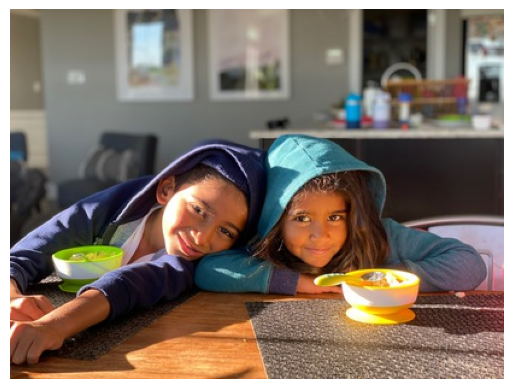

In [2]:
im = plt.imread('breakfeast.jpg')
plt.imshow(im); plt.axis('off'); #plt.show() in interactive mode
type(im), np.shape(im), im[0:5,0:5,1]

(numpy.ndarray, (307, 410), dtype('float64'))

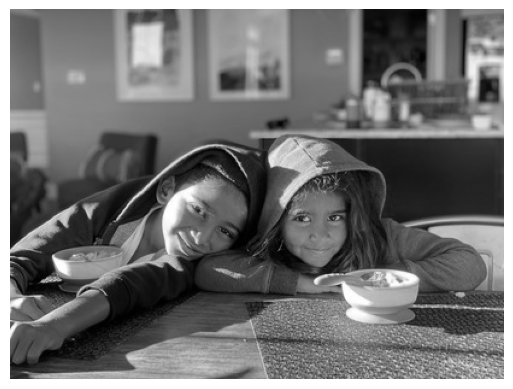

In [3]:
img = np.mean(im,2)
plt.imshow(img, cmap = 'gray'); plt.axis('off');
#plt.imshow(im)
type(img), np.shape(img), img.dtype
#type(im), np.shape(im), im.dtype

(array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]]),
 array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]))

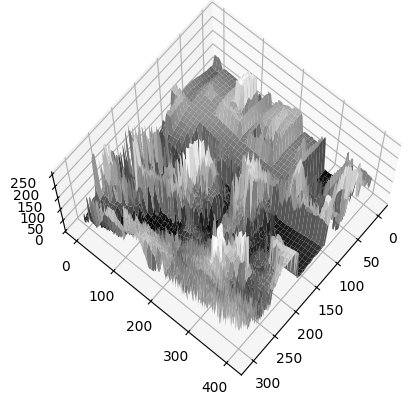

In [4]:
X,Y = np.mgrid[0:img.shape[0],0:img.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(azim=40,elev=70)
ax.plot_surface(X, Y, img, cmap = 'gray');
X[0:5,0:5], Y[0:5,0:5]

(307, 410)

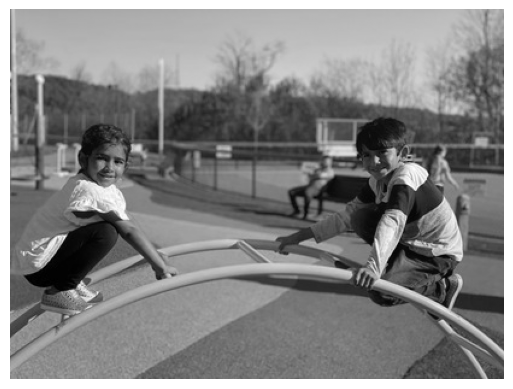

In [5]:
im2 = plt.imread('playground.jpg')
im2 = np.mean(im2,2)
plt.imshow(im2, cmap = 'gray'); plt.axis('off');
np.shape(im2)

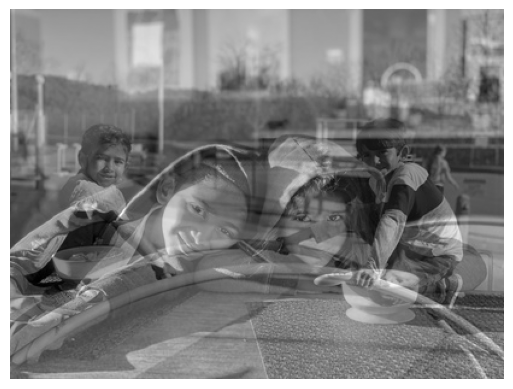

In [10]:
im3 = np.zeros(img.shape)
#for i in range(img.shape[0]):
#  for j in range(img.shape[1]):
    #im3[i,j] = .5*img[i,j] #Why does this not appear to change the visual?
    #im3[i,j] = img[i,j]**2
    #im3[i,j] = img[i,j]**.5
    #if j > 100: im3[i,j] = img[i,j-100]
#    im3[i,j] = .5*img[i,j] + .5*im2[i,j]
#     im3[i,j] = .5*(img[i,j] + im2[i,j]) # Pop quiz (1): why is would this line be incorrect if img is replaced by im1?
# Pop quiz (2): match i-vs-j to row-vs-col (this leads to inconsistency between math + implementation)
# Pop quiz (3): why is looping over i-then-j faster than j-then-i? (C-like row-major storage)
im3 = .5*img + .5*im2;
#im3 = img[:,:-100]; print(im3.shape), print(img.shape)
plt.imshow(im3, cmap = 'gray'); plt.axis('off');
#img[0:5,0:5]
#im3[0:5,0:5]

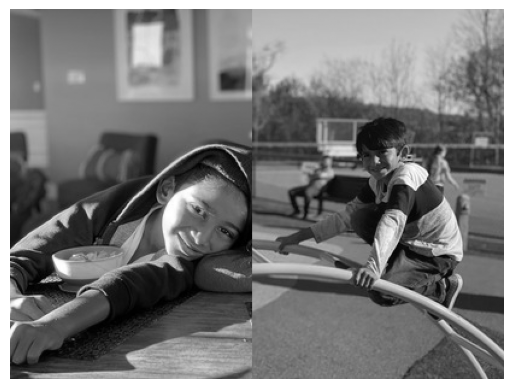

In [7]:
im4 = img.copy()
im4[:,201:] = im2[:,201:]
plt.imshow(im4, cmap = 'gray'); plt.axis('off');

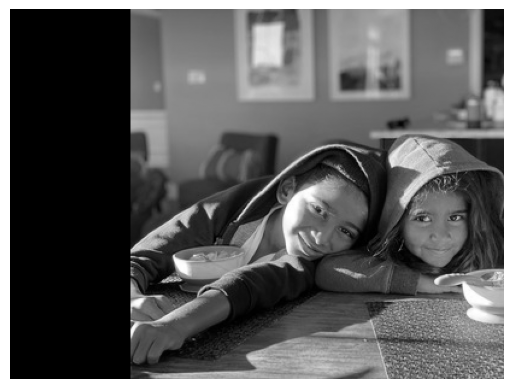

In [8]:
im5 = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]-100):
        im5[i,j+100] = img[i,j]
#im5[:,101:410] = im[:,1:310]

#im5 = np.zeros(img.shape); im5[:,100:] = img[:,:-100]
plt.imshow(im5, cmap = 'gray'); plt.axis('off');